# Data Science Unit 1 Sprint Challenge 2

## Data Wrangling and Storytelling

Taming data from its raw form into informative insights and stories.

## Data Wrangling

In this Sprint Challenge you will first "wrangle" some data from [Gapminder](https://www.gapminder.org/about-gapminder/), a Swedish non-profit co-founded by Hans Rosling. "Gapminder produces free teaching resources making the world understandable based on reliable statistics."
- [Cell phones (total), by country and year](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--cell_phones_total--by--geo--time.csv)
- [Population (total), by country and year](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--population_total--by--geo--time.csv)
- [Geo country codes](https://github.com/open-numbers/ddf--gapminder--systema_globalis/blob/master/ddf--entities--geo--country.csv)

These two links have everything you need to successfully complete the first part of this sprint challenge.
- [Pandas documentation: Working with Text Data](https://pandas.pydata.org/pandas-docs/stable/text.html) (one question)
- [Pandas Cheat Sheet](https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf) (everything else)

### Part 0. Load data

You don't need to add or change anything here. Just run this cell and it loads the data for you, into three dataframes.

In [159]:
import pandas as pd

cell_phones = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--cell_phones_total--by--geo--time.csv')

population = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--population_total--by--geo--time.csv')

geo_country_codes = (pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--entities--geo--country.csv')
                       .rename(columns={'country': 'geo', 'name': 'country'}))

In [160]:
#checking data
print(cell_phones.shape)
cell_phones.head()

(9215, 3)


,geo,time,cell_phones_total
0,abw,1960,0.0
1,abw,1965,0.0
2,abw,1970,0.0
3,abw,1975,0.0
4,abw,1976,0.0


In [161]:
#checking data
print(population.shape)
population.head()

(59297, 3)


,geo,time,population_total
0,afg,1800,3280000
1,afg,1801,3280000
2,afg,1802,3280000
3,afg,1803,3280000
4,afg,1804,3280000


In [162]:
#checking data
print(geo_country_codes.shape)
geo_country_codes.head()

(273, 33)


,geo,alt_5,alternative_1,alternative_2,alternative_3,alternative_4_cdiac,arb1,arb2,arb3,arb4,...,latitude,longitude,main_religion_2008,country,pandg,un_state,unicode_region_subtag,upper_case_name,world_4region,world_6region
0,abkh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,nan,nan,NaN,Abkhazia,NaN,False,NaN,NaN,europe,europe_central_asia
1,abw,NaN,NaN,NaN,NaN,Aruba,NaN,NaN,NaN,NaN,...,12.5,-69.96667,christian,Aruba,NaN,False,AW,ARUBA,americas,america
2,afg,NaN,Islamic Republic of Afghanistan,NaN,NaN,Afghanistan,NaN,NaN,NaN,NaN,...,33.0,66.0,muslim,Afghanistan,AFGHANISTAN,True,AF,AFGHANISTAN,asia,south_asia
3,ago,NaN,NaN,NaN,NaN,Angola,NaN,NaN,NaN,NaN,...,-12.5,18.5,christian,Angola,ANGOLA,True,AO,ANGOLA,africa,sub_saharan_africa
4,aia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,18.21667,-63.05,christian,Anguilla,NaN,False,AI,ANGUILLA,americas,america


### Part 1. Join data

First, join the `cell_phones` and `population` dataframes (with an inner join on `geo` and `time`).

The resulting dataframe's shape should be: (8590, 4)

In [163]:
#merging first 2 data sets 
merge1 = pd.merge(cell_phones, population, how='inner', on=['geo', 'time'])

In [164]:
#checking merged dataset for accuracy 
print(merge1.shape)
merge1.head()

(8590, 4)


,geo,time,cell_phones_total,population_total
0,afg,1960,0.0,8996351
1,afg,1965,0.0,9938414
2,afg,1970,0.0,11126123
3,afg,1975,0.0,12590286
4,afg,1976,0.0,12840299


Then, select the `geo` and `country` columns from the `geo_country_codes` dataframe, and join with your population and cell phone data.

The resulting dataframe's shape should be: (8590, 5)

In [165]:
#merging the first merge and the last data set 
df = pd.merge(merge1, geo_country_codes[['geo', 'country']], how='inner', on='geo')

In [166]:
#checking the final merge 
print(df.shape)
df.head()

(8590, 5)


,geo,time,cell_phones_total,population_total,country
0,afg,1960,0.0,8996351,Afghanistan
1,afg,1965,0.0,9938414,Afghanistan
2,afg,1970,0.0,11126123,Afghanistan
3,afg,1975,0.0,12590286,Afghanistan
4,afg,1976,0.0,12840299,Afghanistan


In [167]:
#exploring the data
df.describe()

,time,cell_phones_total,population_total
count,"8,590.0","8,590.0","8,590.0"
mean,"1,994.1934807916182","9,004,949.642905472","29,838,230.581722934"
std,14.257974607310302,"55,734,084.872179635","116,128,377.47477299"
min,"1,960.0",0.0,"4,433.0"
25%,"1,983.0",0.0,"1,456,148.0"
50%,"1,995.0","6,200.0","5,725,062.5"
75%,"2,006.0","1,697,652.0","18,105,812.0"
max,"2,017.0","1,474,097,000.0","1,409,517,397.0"


In [168]:
#checking for NaN values
df.isna().sum()

geo                  0
time                 0
cell_phones_total    0
population_total     0
country              0
dtype: int64

### Part 2. Make features

Calculate the number of cell phones per person, and add this column onto your dataframe.

(You've calculated correctly if you get 1.220 cell phones per person in the United States in 2017.)

In [169]:
#calculating cell phones per person
df['cellphone_per_person'] = (df['cell_phones_total'] / df['population_total'])
#maybe round

In [170]:
df.head()

,geo,time,cell_phones_total,population_total,country,cellphone_per_person
0,afg,1960,0.0,8996351,Afghanistan,0.0
1,afg,1965,0.0,9938414,Afghanistan,0.0
2,afg,1970,0.0,11126123,Afghanistan,0.0
3,afg,1975,0.0,12590286,Afghanistan,0.0
4,afg,1976,0.0,12840299,Afghanistan,0.0


In [171]:
#verify my calculations were correct, by checking the value for the US in 2017
df[(df['country'] == 'United States') & (df['time'] == 2017)]
#looks good so far

,geo,time,cell_phones_total,population_total,country,cellphone_per_person
8134,usa,2017,"395,881,000.0",324459463,United States,1.2201246847283354


Modify the `geo` column to make the geo codes uppercase instead of lowercase.

In [172]:
#making the 'geo' column uppercase
df['geo'] = df['geo'].str.upper()

In [173]:
df.head(10)

,geo,time,cell_phones_total,population_total,country,cellphone_per_person
0,AFG,1960,0.0,8996351,Afghanistan,0.0
1,AFG,1965,0.0,9938414,Afghanistan,0.0
2,AFG,1970,0.0,11126123,Afghanistan,0.0
3,AFG,1975,0.0,12590286,Afghanistan,0.0
4,AFG,1976,0.0,12840299,Afghanistan,0.0
5,AFG,1977,0.0,13067538,Afghanistan,0.0
6,AFG,1978,0.0,13237734,Afghanistan,0.0
7,AFG,1979,0.0,13306695,Afghanistan,0.0
8,AFG,1980,0.0,13248370,Afghanistan,0.0
9,AFG,1981,0.0,13053954,Afghanistan,0.0


### Part 3. Process data

Use the describe function, to describe your dataframe's numeric columns, and then its non-numeric columns.

(You'll see the time period ranges from 1960 to 2017, and there are 195 unique countries represented.)

In [174]:
import numpy as np
df.dtypes

geo                      object
time                      int64
cell_phones_total       float64
population_total          int64
country                  object
cellphone_per_person    float64
dtype: object

In [175]:
#only numeric
df.describe(exclude=[np.object])

,time,cell_phones_total,population_total,cellphone_per_person
count,"8,590.0","8,590.0","8,590.0","8,590.0"
mean,"1,994.1934807916182","9,004,949.642905472","29,838,230.581722934",0.2796385558059151
std,14.257974607310302,"55,734,084.872179635","116,128,377.47477299",0.454246656214052
min,"1,960.0",0.0,"4,433.0",0.0
25%,"1,983.0",0.0,"1,456,148.0",0.0
50%,"1,995.0","6,200.0","5,725,062.5",0.0015636266438163813
75%,"2,006.0","1,697,652.0","18,105,812.0",0.4611491855201403
max,"2,017.0","1,474,097,000.0","1,409,517,397.0",2.490242818521353


In [176]:
#only objects
df.describe(exclude=[np.number])

,geo,country
count,8590,8590
unique,195,195
top,IRQ,Slovak Republic
freq,46,46


In 2017, what were the top 5 countries with the most cell phones total?

Your list of countries should have these totals:

| country | cell phones total |
|:-------:|:-----------------:|
|    ?    |     1,474,097,000 |
|    ?    |     1,168,902,277 |
|    ?    |       458,923,202 |
|    ?    |       395,881,000 |
|    ?    |       236,488,548 |



In [177]:
# This optional code formats float numbers with comma separators
pd.options.display.float_format = '{:,}'.format

In [178]:
#making new dataframe with only values from 2017
year_2017 = df[df['time'] == 2017]


In [179]:
#refind this dataframe to only country and cell phones total columns
country_cell = year_2017[['country', 'cell_phones_total']]

In [180]:
#sorting the call_phone_total column highest to lowest
country_cell = country_cell.sort_values(by=['cell_phones_total'], ascending=False)
country_cell.head()

,country,cell_phones_total
1496,China,"1,474,097,000.0"
3595,India,"1,168,902,277.0"
3549,Indonesia,"458,923,202.0"
8134,United States,"395,881,000.0"
1084,Brazil,"236,488,548.0"


2017 was the first year that China had more cell phones than people.

What was the first year that the USA had more cell phones than people?

In [181]:
#making USA only dataframe
usa = df[df.country == 'United States']

In [182]:
#checking for years where there are more phones than people
more_cell_than_ppl = usa[(usa.cell_phones_total) > (usa.population_total)]

In [183]:
more_cell_than_ppl.head()

,geo,time,cell_phones_total,population_total,country,cellphone_per_person
8131,USA,2014,"355,500,000.0",317718779,United States,1.118914031833164
8132,USA,2015,"382,307,000.0",319929162,United States,1.1949739048796058
8133,USA,2016,"395,881,000.0",322179605,United States,1.228758722948959
8134,USA,2017,"395,881,000.0",324459463,United States,1.2201246847283354


In [184]:
#verifying my findings
usa[usa['time'] == 2013]

,geo,time,cell_phones_total,population_total,country,cellphone_per_person
8130,USA,2013,"310,698,000.0",315536676,United States,0.9846652501340288


## The first year the US had more cell phones than people is the year 2014

### Part 4. Reshape data

*This part is not needed to pass the sprint challenge, only to get a 3! Only work on this after completing the other sections.*

Create a pivot table:
- Columns: Years 2007—2017
- Rows: China, India, United States, Indonesia, Brazil (order doesn't matter)
- Values: Cell Phones Total

The table's shape should be: (5, 11)

In [191]:
#filter only the desired years 
df = df[(df['time'] <= 2017) & (df['time'] >= 2007)]
df['time'].unique()

array([2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017],
      dtype=int64)

In [192]:
#filter only desired countries 
countries = [ 'China', 'India', 'United States', 'Indonesia', 'Brazil' ]
df = df[df['country'].isin(countries)]

In [194]:
#verify 
print(df['country'].unique())
df.head()

['Brazil' 'China' 'Indonesia' 'India' 'United States']


,geo,time,cell_phones_total,population_total,country,cellphone_per_person
1074,BRA,2007,"120,980,103.0",191026637,Brazil,0.6333153580042348
1075,BRA,2008,"150,641,403.0",192979029,Brazil,0.7806102237150339
1076,BRA,2009,"169,385,584.0",194895996,Brazil,0.869107562373934
1077,BRA,2010,"196,929,978.0",196796269,Brazil,1.000679428531239
1078,BRA,2011,"234,357,507.0",198686688,Brazil,1.1795330092774006


In [195]:
#getting rod of columns I do not need 
df = df.drop(columns=['geo', 'population_total', 'cellphone_per_person'])
df.head()

,time,cell_phones_total,country
1074,2007,"120,980,103.0",Brazil
1075,2008,"150,641,403.0",Brazil
1076,2009,"169,385,584.0",Brazil
1077,2010,"196,929,978.0",Brazil
1078,2011,"234,357,507.0",Brazil


In [199]:
#creating pivot table to required specification 
pivtbl = pd.pivot_table(df, values='cell_phones_total', columns='time', index='country')
pivtbl

time,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
country,,,,,,,,,,,
Brazil,"120,980,103.0","150,641,403.0","169,385,584.0","196,929,978.0","234,357,507.0","248,323,703.0","271,099,799.0","280,728,796.0","257,814,274.0","244,067,356.0","236,488,548.0"
China,"547,306,000.0","641,245,000.0","747,214,000.0","859,003,000.0","986,253,000.0","1,112,155,000.0","1,229,113,000.0","1,286,093,000.0","1,291,984,200.0","1,364,934,000.0","1,474,097,000.0"
India,"233,620,000.0","346,890,000.0","525,090,000.0","752,190,000.0","893,862,478.0","864,720,917.0","886,304,245.0","944,008,677.0","1,001,056,000.0","1,127,809,000.0","1,168,902,277.0"
Indonesia,"93,386,881.0","140,578,243.0","163,676,961.0","211,290,235.0","249,805,619.0","281,963,665.0","313,226,914.0","325,582,819.0","338,948,340.0","385,573,398.0","458,923,202.0"
United States,"249,300,000.0","261,300,000.0","274,283,000.0","285,118,000.0","297,404,000.0","304,838,000.0","310,698,000.0","355,500,000.0","382,307,000.0","395,881,000.0","395,881,000.0"


Sort these 5 countries, by biggest increase in cell phones from 2007 to 2017.

Which country had 935,282,277 more cell phones in 2017 versus 2007?

In [203]:
#calculating difference in the number of phones between 2007 and 2017
diff_btw_cellphones = pivtbl[2017] - pivtbl[2007]
diff_btw_cellphones

country
Brazil          115,508,445.0
China           926,791,000.0
India           935,282,277.0
Indonesia       365,536,321.0
United States   146,581,000.0
dtype: float64

## India had the biggest increase of cellphones between 2007 and 2017 

In [207]:
#Check answer
diff_btw_cellphones['India']

935282277.0

If you have the time and curiosity, what other questions can you ask and answer with this data?

### As more peeple get their hands on technology like smart phones, does the standard of living for those people also increase?

## Data Storytelling

In this part of the sprint challenge you'll work with a dataset from **FiveThirtyEight's article, [Every Guest Jon Stewart Ever Had On ‘The Daily Show’](https://fivethirtyeight.com/features/every-guest-jon-stewart-ever-had-on-the-daily-show/)**!

### Part 0 — Run this starter code

You don't need to add or change anything here. Just run this cell and it loads the data for you, into a dataframe named `df`.

(You can explore the data if you want, but it's not required to pass the Sprint Challenge.)

In [76]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

url = 'https://raw.githubusercontent.com/fivethirtyeight/data/master/daily-show-guests/daily_show_guests.csv'
df = pd.read_csv(url).rename(columns={'YEAR': 'Year', 'Raw_Guest_List': 'Guest'})

def get_occupation(group):
    if group in ['Acting', 'Comedy', 'Musician']:
        return 'Acting, Comedy & Music'
    elif group in ['Media', 'media']:
        return 'Media'
    elif group in ['Government', 'Politician', 'Political Aide']:
        return 'Government and Politics'
    else:
        return 'Other'
      
df['Occupation'] = df['Group'].apply(get_occupation)

### Part 1 — What's the breakdown of guests’ occupations per year?

For example, in 1999, what percentage of guests were actors, comedians, or musicians? What percentage were in the media? What percentage were in politics? What percentage were from another occupation?

Then, what about in 2000? In 2001? And so on, up through 2015.

So, **for each year of _The Daily Show_, calculate the percentage of guests from each occupation:**
- Acting, Comedy & Music
- Government and Politics
- Media
- Other

#### Hints:
You can make a crosstab. (See pandas documentation for examples, explanation, and parameters.)

You'll know you've calculated correctly when the percentage of "Acting, Comedy & Music" guests is 90.36% in 1999, and 45% in 2015.

In [77]:
df.head()

,Year,GoogleKnowlege_Occupation,Show,Group,Guest,Occupation
0,1999,actor,1/11/99,Acting,Michael J. Fox,"Acting, Comedy & Music"
1,1999,Comedian,1/12/99,Comedy,Sandra Bernhard,"Acting, Comedy & Music"
2,1999,television actress,1/13/99,Acting,Tracey Ullman,"Acting, Comedy & Music"
3,1999,film actress,1/14/99,Acting,Gillian Anderson,"Acting, Comedy & Music"
4,1999,actor,1/18/99,Acting,David Alan Grier,"Acting, Comedy & Music"


In [78]:
#exploring data
df['Year'].nunique()

17

In [81]:
#binning the years
year_bins = pd.cut(df['Year'], 17)

In [82]:
#creating a crrosstab to figure out the percent for each group each year 
crosstab = pd.crosstab(year_bins, df['Occupation'], normalize='index')
crosstab

Occupation,"Acting, Comedy & Music",Government and Politics,Media,Other
Year,,,,
"(1998.984, 1999.941]",0.9036144578313253,0.012048192771084338,0.06626506024096386,0.018072289156626505
"(1999.941, 2000.882]",0.7396449704142012,0.08284023668639054,0.1242603550295858,0.05325443786982249
"(2000.882, 2001.824]",0.7261146496815286,0.03821656050955414,0.19745222929936307,0.03821656050955414
"(2001.824, 2002.765]",0.6226415094339622,0.06918238993710692,0.2641509433962264,0.0440251572327044
"(2002.765, 2003.706]",0.5602409638554217,0.10240963855421686,0.2469879518072289,0.09036144578313253
"(2003.706, 2004.647]",0.38414634146341464,0.22560975609756098,0.27439024390243905,0.11585365853658537
"(2004.647, 2005.588]",0.37037037037037035,0.16049382716049382,0.3333333333333333,0.13580246913580246
"(2005.588, 2006.529]",0.36024844720496896,0.19254658385093168,0.2919254658385093,0.15527950310559005
"(2006.529, 2007.471]",0.2553191489361702,0.1702127659574468,0.3333333333333333,0.24113475177304963


In [87]:
#Convering decimalpercent to full number (0.15 -> 15) 
crosstab = crosstab[['Acting, Comedy & Music', 'Government and Politics', 'Media', 'Other']] *100

In [88]:
crosstab

Occupation,"Acting, Comedy & Music",Government and Politics,Media,Other
Year,,,,
"(1998.984, 1999.941]",90.36144578313254,1.2048192771084338,6.626506024096386,1.8072289156626504
"(1999.941, 2000.882]",73.96449704142012,8.284023668639055,12.42603550295858,5.325443786982249
"(2000.882, 2001.824]",72.61146496815286,3.821656050955414,19.745222929936308,3.821656050955414
"(2001.824, 2002.765]",62.264150943396224,6.918238993710692,26.41509433962264,4.40251572327044
"(2002.765, 2003.706]",56.024096385542165,10.240963855421686,24.69879518072289,9.036144578313253
"(2003.706, 2004.647]",38.41463414634146,22.5609756097561,27.439024390243905,11.585365853658537
"(2004.647, 2005.588]",37.03703703703704,16.049382716049383,33.33333333333333,13.580246913580247
"(2005.588, 2006.529]",36.024844720496894,19.25465838509317,29.19254658385093,15.527950310559005
"(2006.529, 2007.471]",25.53191489361702,17.02127659574468,33.33333333333333,24.113475177304963


In [93]:
# making table into its own new dataframe (probably unnecessary)
new_df = pd.DataFrame(crosstab)
new_df.columns

Index(['Acting, Comedy & Music', 'Government and Politics', 'Media', 'Other'], dtype='object', name='Occupation')

In [101]:
#new year column to look more polished
new_df['year'] = [1999, 2000, 2001, 2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015]

In [102]:
new_df.head()

Occupation,"Acting, Comedy & Music",Government and Politics,Media,Other,year
Year,,,,,
"(1998.984, 1999.941]",90.36144578313254,1.2048192771084338,6.626506024096386,1.8072289156626504,1999
"(1999.941, 2000.882]",73.96449704142012,8.284023668639055,12.42603550295858,5.325443786982249,2000
"(2000.882, 2001.824]",72.61146496815286,3.821656050955414,19.745222929936308,3.821656050955414,2001
"(2001.824, 2002.765]",62.264150943396224,6.918238993710692,26.41509433962264,4.40251572327044,2002
"(2002.765, 2003.706]",56.024096385542165,10.240963855421686,24.69879518072289,9.036144578313253,2003


pandas.core.series.Series

### Part 2 — Recreate this explanatory visualization:

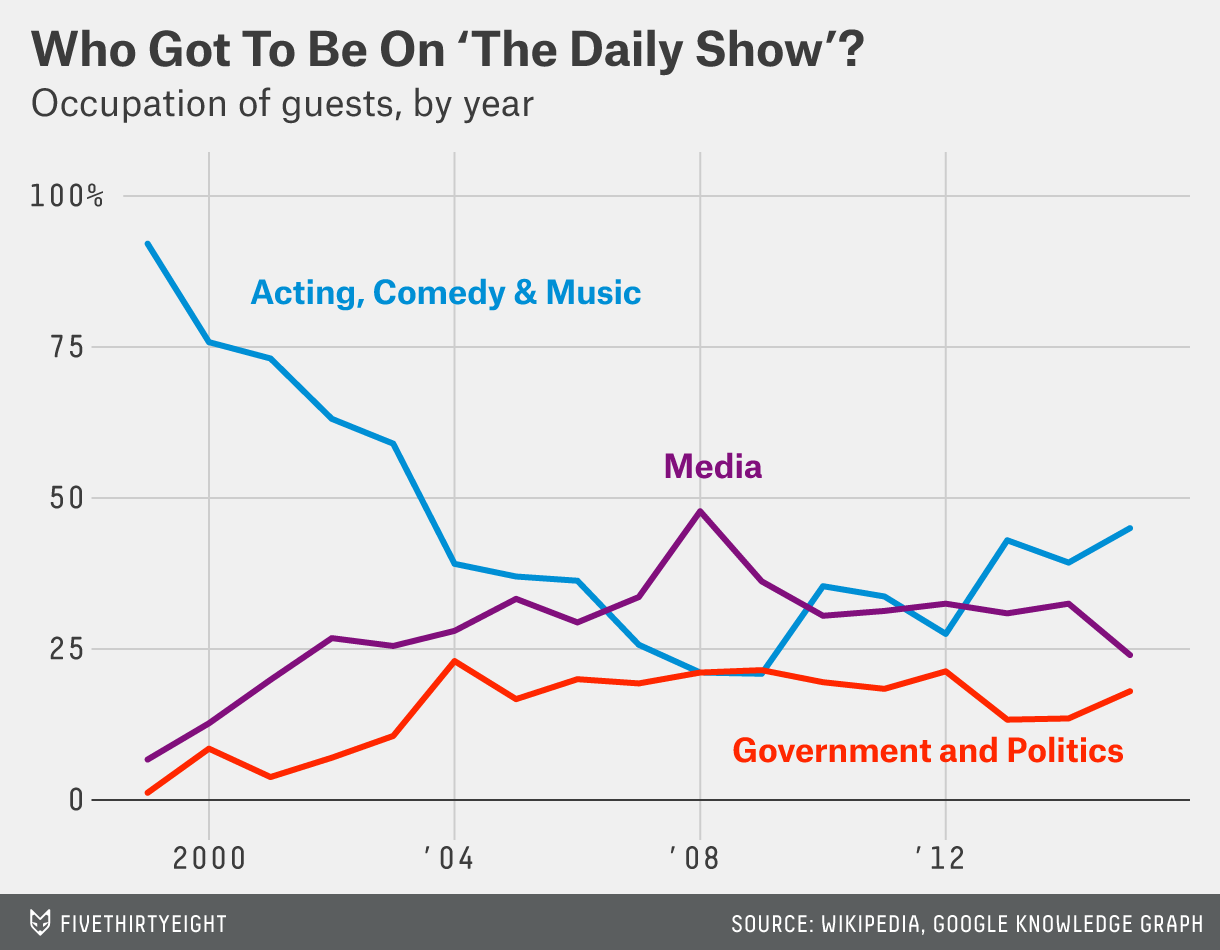

In [83]:
from IPython.display import display, Image
png = 'https://fivethirtyeight.com/wp-content/uploads/2015/08/hickey-datalab-dailyshow.png'
example = Image(png, width=500)
display(example)

In [89]:
import seaborn as sns
import matplotlib.pyplot as plt

<Figure size 1080x1080 with 0 Axes>

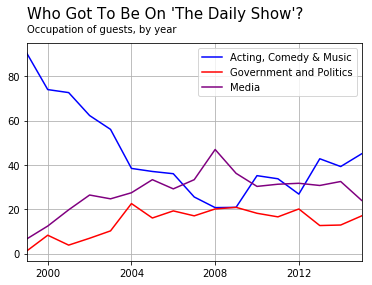

In [158]:
%matplotlib inline
#recreating the graph
ax = plt.figure(figsize=(15,15))
ax = new_df.plot(x='year', y='Acting, Comedy & Music', kind='line', color='blue')
ax = new_df.plot(ax=ax, x='year', y='Government and Politics', kind='line', color='red')
new_df.plot(ax=ax, x='year', y='Media', kind='line', color='purple')
plt.legend()
plt.xticks([2000, 2004, 2008, 2012])
plt.grid()
plt.xlabel('')
plt.title("Who Got To Be On 'The Daily Show'?", loc='left', pad=25.0, fontsize=15)
plt.text(s="Occupation of guests, by year", x=1999, y=100)
plt.show();

**Hints:**
- You can choose any Python visualization library you want. I've verified the plot can be reproduced with matplotlib, pandas plot, or seaborn. I assume other libraries like altair or plotly would work too.
- If you choose to use seaborn, you may want to upgrade the version to 0.9.0.

**Expectations:** Your plot should include:
- 3 lines visualizing "occupation of guests, by year." The shapes of the lines should look roughly identical to 538's example. Each line should be a different color. (But you don't need to use the _same_ colors as 538.)
- Legend or labels for the lines. (But you don't need each label positioned next to its line or colored like 538.)
- Title in the upper left: _"Who Got To Be On 'The Daily Show'?"_ with more visual emphasis than the subtitle. (Bolder and/or larger font.)
- Subtitle underneath the title: _"Occupation of guests, by year"_

**Optional Bonus Challenge:**
- Give your plot polished aesthetics, with improved resemblance to the 538 example.
- Any visual element not specifically mentioned in the expectations is an optional bonus.